# Machine Learning-Based Prediction of 30-Day Hospital Readmission in Diabetic Patients

## Exploratory Data Analysis

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./data/raw/day-26.csv")

### Basic Dataset Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101763 non-null  object
 1   gender                    101763 non-null  object
 2   age                       101763 non-null  object
 3   admission_type            101763 non-null  object
 4   discharge_disposition     101763 non-null  object
 5   admission_source          101763 non-null  object
 6   time_in_hospital          101763 non-null  int64 
 7   payer_code                101763 non-null  object
 8   medical_specialty         101763 non-null  object
 9   num_lab_procedures        101763 non-null  int64 
 10  num_procedures            101763 non-null  int64 
 11  num_medications           101763 non-null  int64 
 12  number_outpatient         101763 non-null  int64 
 13  number_emergency          101763 non-null  int64 
 14  numb

In [5]:
df.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,4.396018,43.095909,1.339691,16.021835,0.369368,0.197842,0.635585,7.422649
std,2.985092,19.674220,1.705792,8.127589,1.267282,0.930485,1.262877,1.933578
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
df.describe(include='object')

,race,gender,age,admission_type,discharge_disposition,admission_source,payer_code,medical_specialty,diag_1,diag_2,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763,...,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763
unique,6,2,10,5,16,9,18,16,11,11,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),Emergency,Discharged to home,Emergency Room,Unknown,Unknown,Circulatory,Circulatory,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26066,53988,60232,57492,40255,49947,30335,31364,...,101763,47380,101057,101750,101762,101761,101762,54754,78361,54861


### Target Variable Analysis

In [7]:
# Cheking target variable

df['readmitted'].value_counts()

readmitted
NO     54861
>30    35545
<30    11357
Name: count, dtype: int64

In [8]:
df['readmitted'].value_counts(normalize=True)*100

readmitted
NO     53.910557
>30    34.929198
<30    11.160245
Name: proportion, dtype: float64

<Axes: xlabel='readmitted', ylabel='count'>

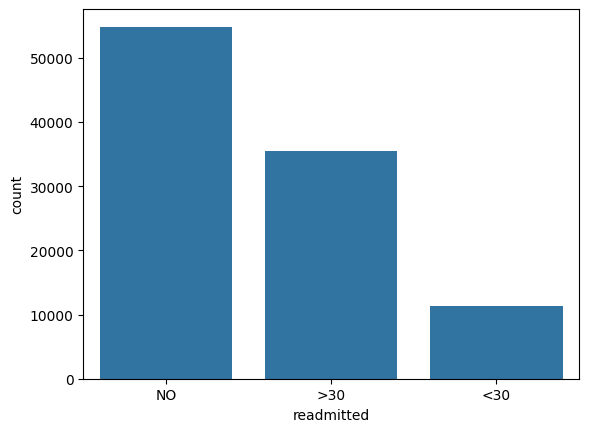

In [9]:
# Distribution of Target Column

sns.countplot(data=df, x='readmitted')

C:\Users\dharm\AppData\Local\Temp\ipykernel_32252\3911595540.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=counts, x='Class', y='Percentage', palette='viridis')


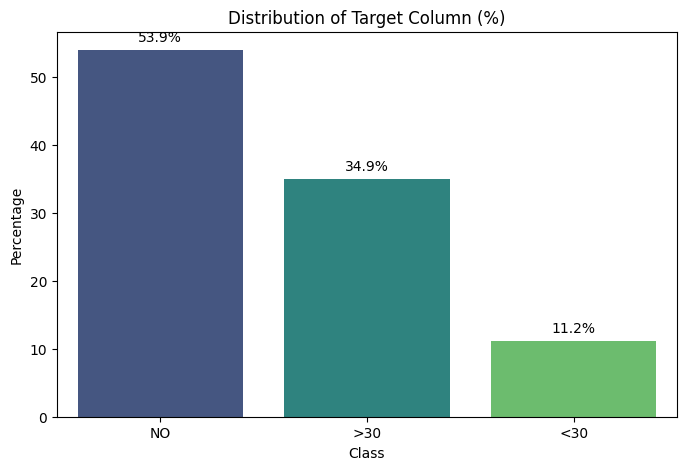

In [10]:
# 1. Calculate percentages
counts = df['readmitted'].value_counts(normalize=True).reset_index()
counts.columns = ['Class', 'Percentage']
counts['Percentage'] *= 100  # Convert to 0-100 scale

# 2. Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=counts, x='Class', y='Percentage', palette='viridis')

# 3. Add labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.title('Distribution of Target Column (%)')
plt.ylabel('Percentage')
plt.show()

In [11]:
# Insights 

# 11.2% of patients are readmitted within 30 days
# we wil consider "NO" amd ">30" as class 0 , so this dataset is imbalanced 

### Numerical Feature Analysis

In [ ]:
# important numerical columns
# ----------------------------
# time_in_hospital
# num_lab_procedures
# num_procedures
# num_medications
# number_outpatient
# number_emergency
# number_inpatient
# number_diagnoses

#### time_in_hospital

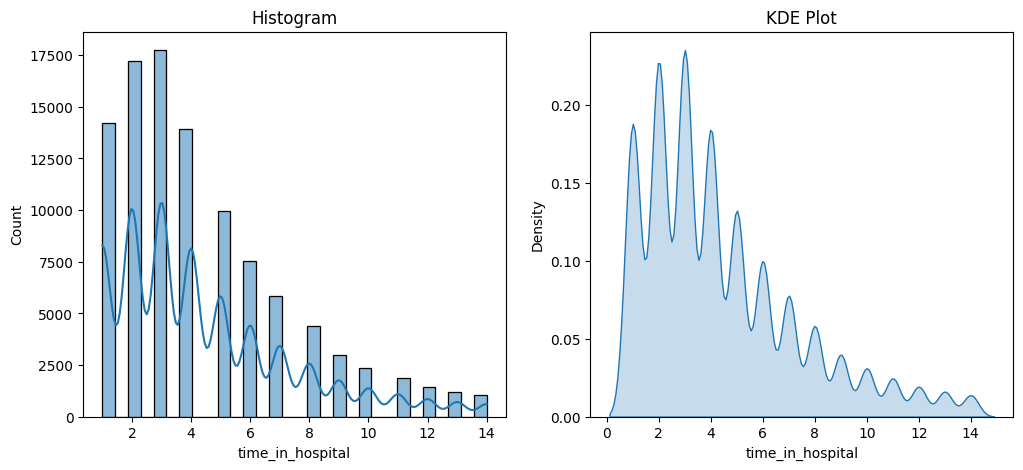

In [13]:
# time_in_hospital

# 1. Distribution

fig , axes = plt.subplots(1,2, figsize=(12,5))

sns.histplot(df['time_in_hospital'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Histogram")

sns.kdeplot(df['time_in_hospital'], fill=True, ax=axes[1])
axes[1].set_title("KDE Plot")

plt.show()

<Axes: xlabel='time_in_hospital'>

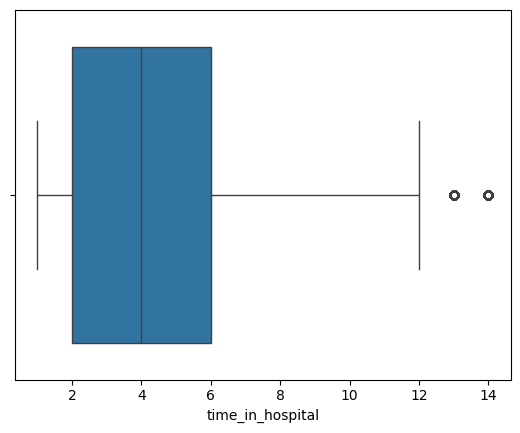

In [14]:
# 2. Boxplot / Outlier detection

sns.boxplot(x=df['time_in_hospital'])

In [15]:
# 3. Mean/Median

print(f"Mean : {df['time_in_hospital'].mean()}")
print(f"Median : {df['time_in_hospital'].median()}")

Mean : 4.396018199149003
Median : 4.0


In [16]:
# 4. Filtering Outlier using IQR

Q1 = df['time_in_hospital'].quantile(0.25)
Q3 = df['time_in_hospital'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = df[(df['time_in_hospital'] < lower_bound) | (df['time_in_hospital'] > upper_bound)]

print(f"Total number of outliers: {outliers.shape[0]}")

Total number of outliers: 2252


<Axes: xlabel='readmitted', ylabel='time_in_hospital'>

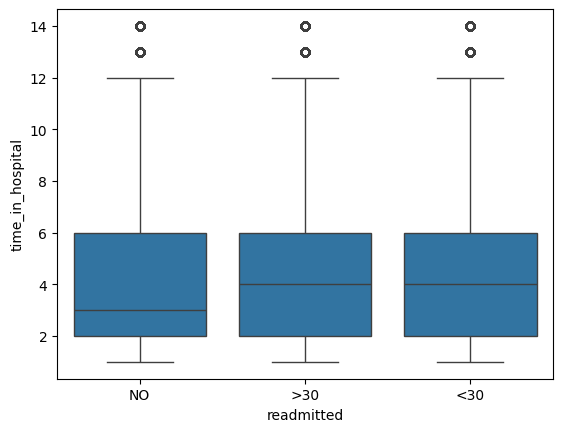

In [17]:
# Does longer hospital stay increase readmission?  -> NO

sns.boxplot(x='readmitted', y='time_in_hospital', data=df)

#### num_lab_procedures

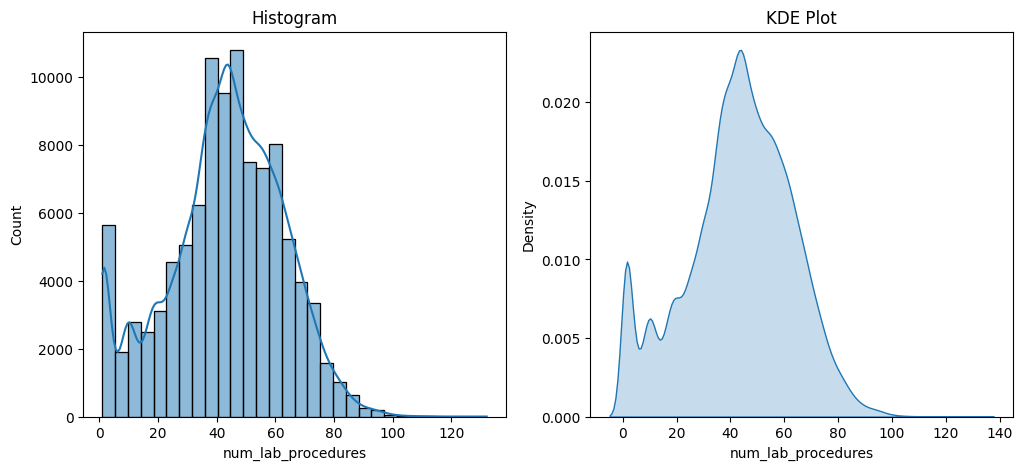

In [18]:
# num_lab_procedures

# 1. Distribution

fig , axes = plt.subplots(1,2, figsize=(12,5))

sns.histplot(df['num_lab_procedures'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Histogram")

sns.kdeplot(df['num_lab_procedures'], fill=True, ax=axes[1])
axes[1].set_title("KDE Plot")

plt.show()

<Axes: xlabel='num_lab_procedures'>

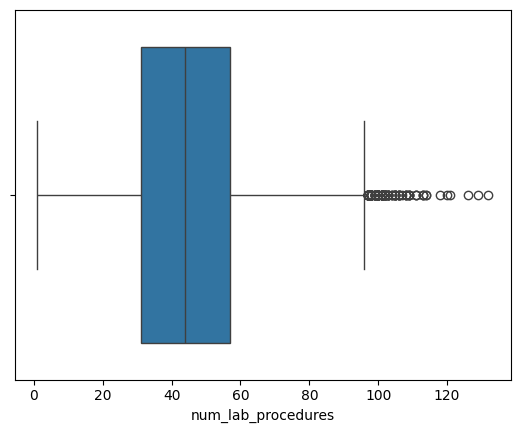

In [19]:
# 2. Boxplot / Outlier detection

sns.boxplot(x=df['num_lab_procedures'])

In [20]:
# 3. Mean/Median

print(f"Mean : {df['num_lab_procedures'].mean()}")
print(f"Median : {df['num_lab_procedures'].median()}")

Mean : 43.09590912217604
Median : 44.0


In [21]:
# 4. Filtering Outlier using IQR

Q1 = df['num_lab_procedures'].quantile(0.25)
Q3 = df['num_lab_procedures'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = df[(df['num_lab_procedures'] < lower_bound) | (df['num_lab_procedures'] > upper_bound)]

print(f"Total number of outliers: {outliers.shape[0]}")

Total number of outliers: 143


<Axes: xlabel='readmitted', ylabel='num_lab_procedures'>

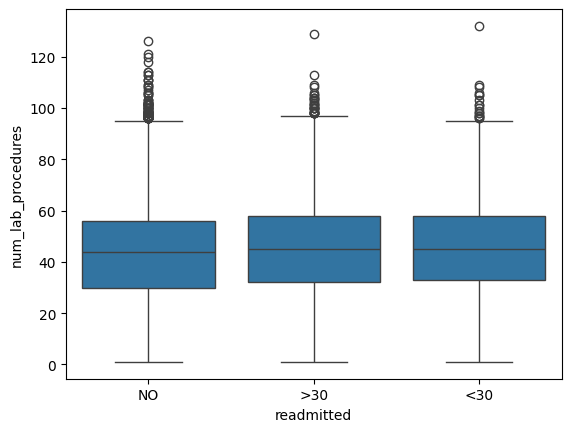

In [22]:
# Do patients with more lab procedures get readmitted more?  -> NO

sns.boxplot(x='readmitted', y='num_lab_procedures', data=df)

#### num_procedures

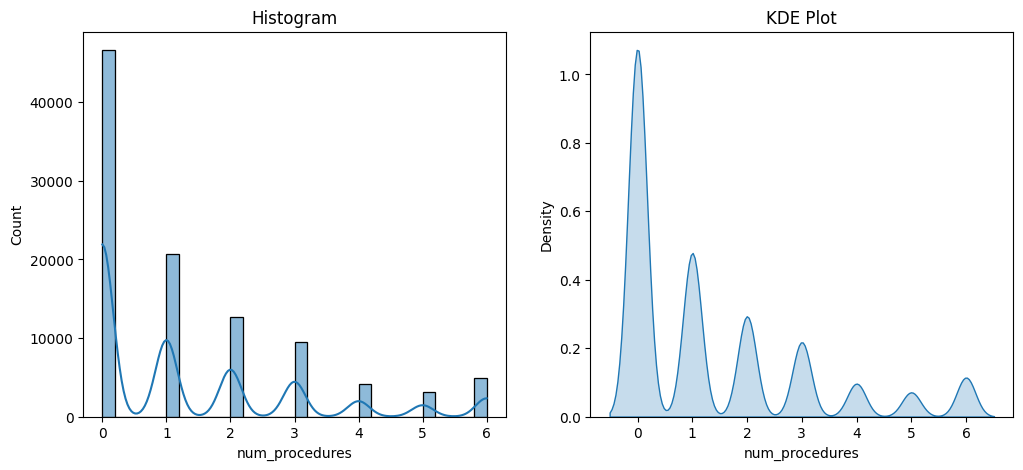

In [23]:
# num_procedures

# 1. Distribution

fig , axes = plt.subplots(1,2, figsize=(12,5))

sns.histplot(df['num_procedures'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Histogram")

sns.kdeplot(df['num_procedures'], fill=True, ax=axes[1])
axes[1].set_title("KDE Plot")

plt.show()

<Axes: xlabel='num_procedures'>

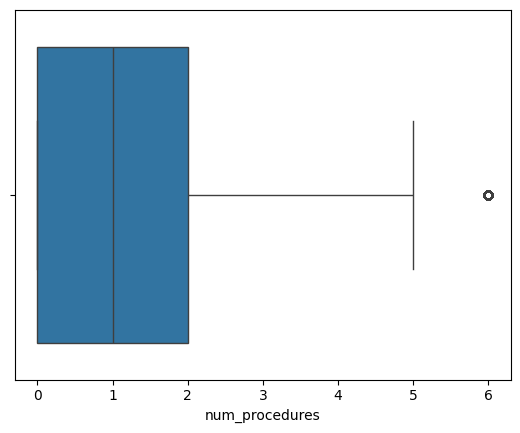

In [24]:
# 2. Boxplot / Outlier detection

sns.boxplot(x=df['num_procedures'])

In [25]:
# 3. Mean/Median

print(f"Mean : {df['num_procedures'].mean()}")
print(f"Median : {df['num_procedures'].median()}")

Mean : 1.3396912433792243
Median : 1.0


In [26]:
# 4. Filtering Outlier using IQR

Q1 = df['num_procedures'].quantile(0.25)
Q3 = df['num_procedures'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = df[(df['num_procedures'] < lower_bound) | (df['num_procedures'] > upper_bound)]

print(f"Total number of outliers: {outliers.shape[0]}")

Total number of outliers: 4954


<Axes: xlabel='readmitted', ylabel='num_procedures'>

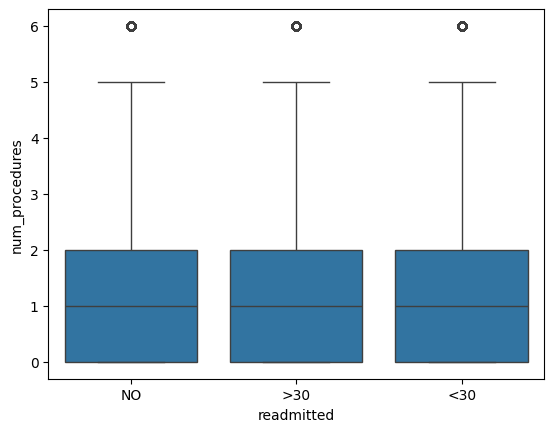

In [27]:
# Do patients with more procedures get readmitted more?  -> NO

sns.boxplot(x='readmitted', y='num_procedures', data=df)

#### num_medications

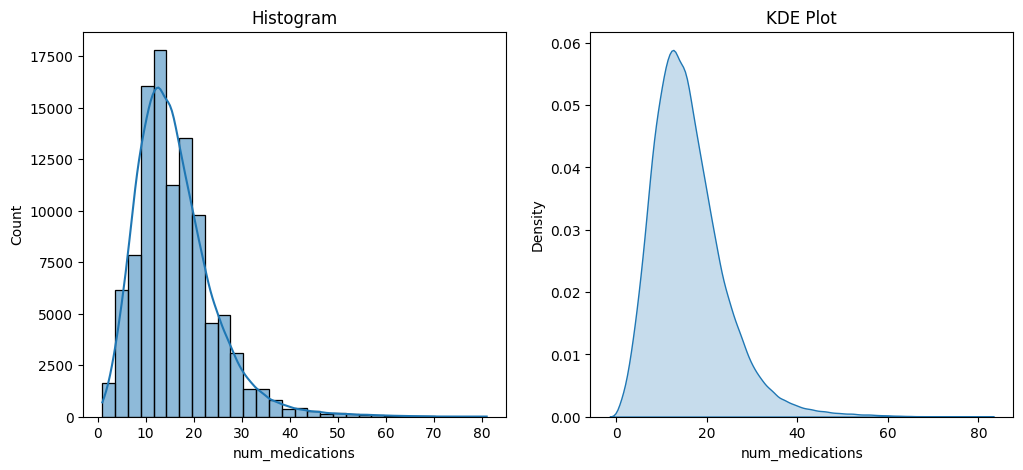

In [28]:
# num_medications

# 1. Distribution

fig , axes = plt.subplots(1,2, figsize=(12,5))

sns.histplot(df['num_medications'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Histogram")

sns.kdeplot(df['num_medications'], fill=True, ax=axes[1])
axes[1].set_title("KDE Plot")

plt.show()

<Axes: xlabel='num_medications'>

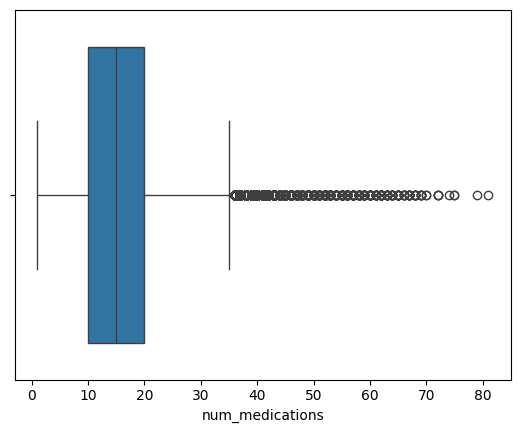

In [29]:
# 2. Boxplot / Outlier detection

sns.boxplot(x=df['num_medications'])

In [30]:
# 3. Mean/Median

print(f"Mean : {df['num_medications'].mean()}")
print(f"Median : {df['num_medications'].median()}")

Mean : 16.021835048101963
Median : 15.0


In [31]:
# 4. Filtering Outlier using IQR

Q1 = df['num_medications'].quantile(0.25)
Q3 = df['num_medications'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = df[(df['num_medications'] < lower_bound) | (df['num_medications'] > upper_bound)]

print(f"Total number of outliers: {outliers.shape[0]}")

Total number of outliers: 2557


<Axes: xlabel='readmitted', ylabel='num_medications'>

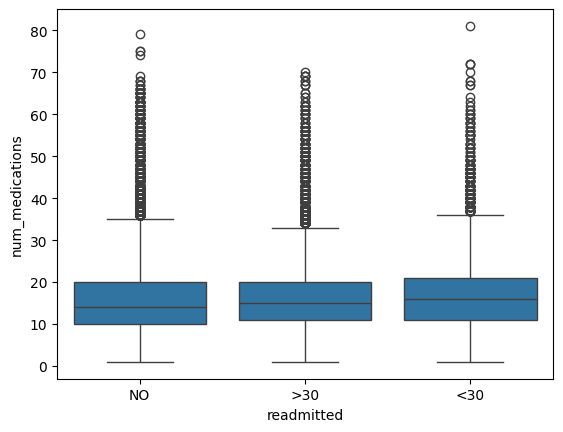

In [32]:
# Do patients who administered more generic names (different drugs) get readmitted more?  -> NO

sns.boxplot(x='readmitted', y='num_medications', data=df)

#### number_outpatient

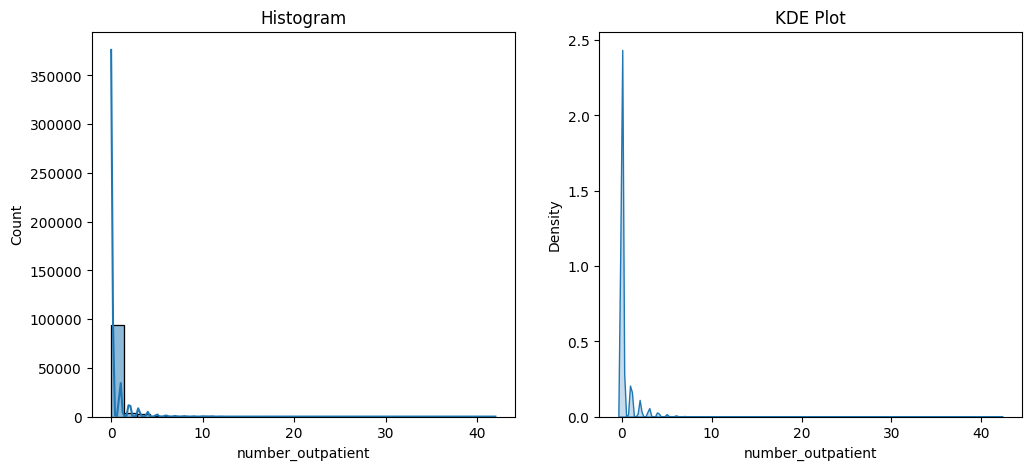

In [33]:
# number_outpatient

# 1. Distribution

fig , axes = plt.subplots(1,2, figsize=(12,5))

sns.histplot(df['number_outpatient'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Histogram")

sns.kdeplot(df['number_outpatient'], fill=True, ax=axes[1])
axes[1].set_title("KDE Plot")

plt.show()

<Axes: xlabel='number_outpatient'>

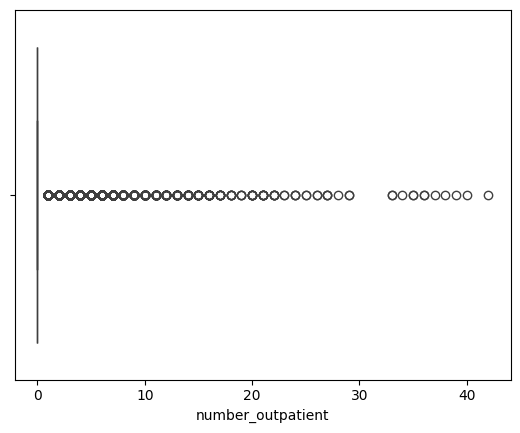

In [34]:
# 2. Boxplot / Outlier detection

sns.boxplot(x=df['number_outpatient'])

In [35]:
# 3. Mean/Median

print(f"Mean : {df['number_outpatient'].mean()}")
print(f"Median : {df['number_outpatient'].median()}")

Mean : 0.36936804142959623
Median : 0.0


In [36]:
# 4. Filtering Outlier using IQR

Q1 = df['number_outpatient'].quantile(0.25)
Q3 = df['number_outpatient'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = df[(df['number_outpatient'] < lower_bound) | (df['number_outpatient'] > upper_bound)]

print(f"Total number of outliers: {outliers.shape[0]}")

Total number of outliers: 16739


<Axes: xlabel='readmitted', ylabel='number_outpatient'>

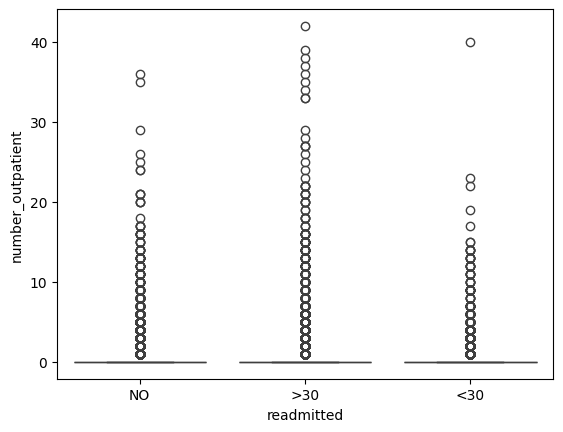

In [37]:
sns.boxplot(x='readmitted', y='number_outpatient', data=df)

#### number_emergency

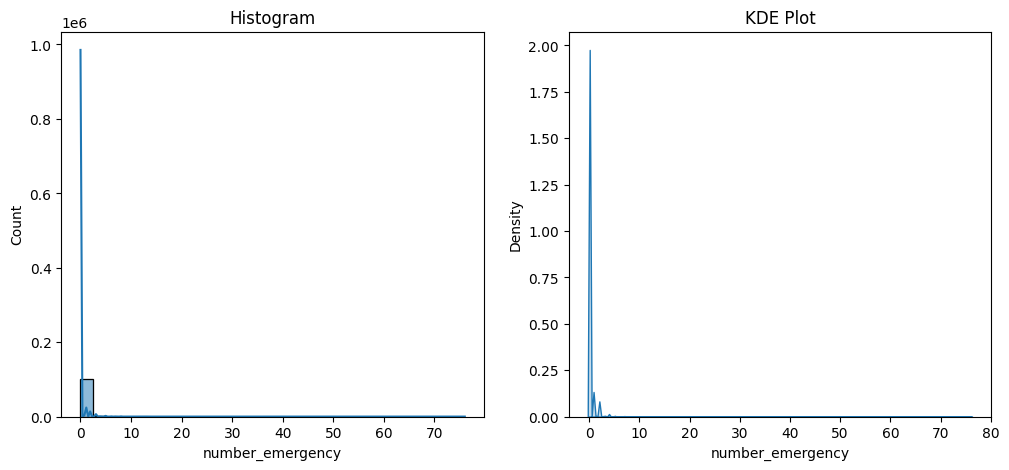

In [38]:
# number_emergency

# 1. Distribution

fig , axes = plt.subplots(1,2, figsize=(12,5))

sns.histplot(df['number_emergency'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Histogram")

sns.kdeplot(df['number_emergency'], fill=True, ax=axes[1])
axes[1].set_title("KDE Plot")

plt.show()

<Axes: xlabel='number_emergency'>

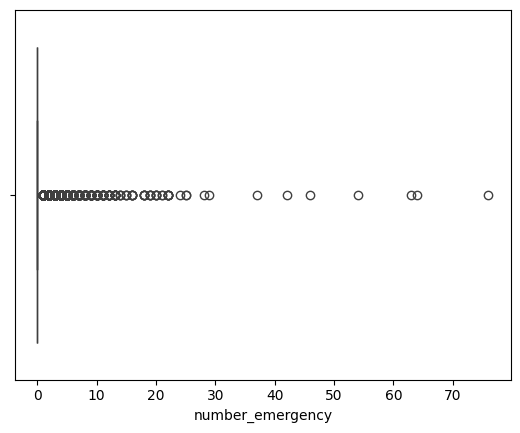

In [39]:
# 2. Boxplot / Outlier detection

sns.boxplot(x=df['number_emergency'])

In [40]:
# 3. Mean/Median

print(f"Mean : {df['number_emergency'].mean()}")
print(f"Median : {df['number_emergency'].median()}")

Mean : 0.19784204475103917
Median : 0.0


In [41]:
# 4. Filtering Outlier using IQR

Q1 = df['number_emergency'].quantile(0.25)
Q3 = df['number_emergency'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = df[(df['number_emergency'] < lower_bound) | (df['number_emergency'] > upper_bound)]

print(f"Total number of outliers: {outliers.shape[0]}")

Total number of outliers: 11383


<Axes: xlabel='readmitted', ylabel='number_emergency'>

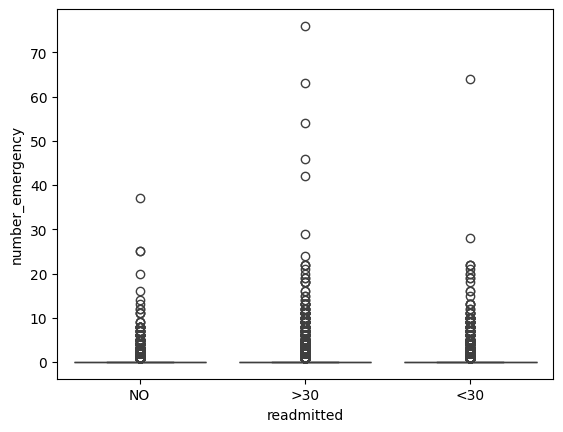

In [42]:
sns.boxplot(x='readmitted', y='number_emergency', data=df)

#### number_inpatient

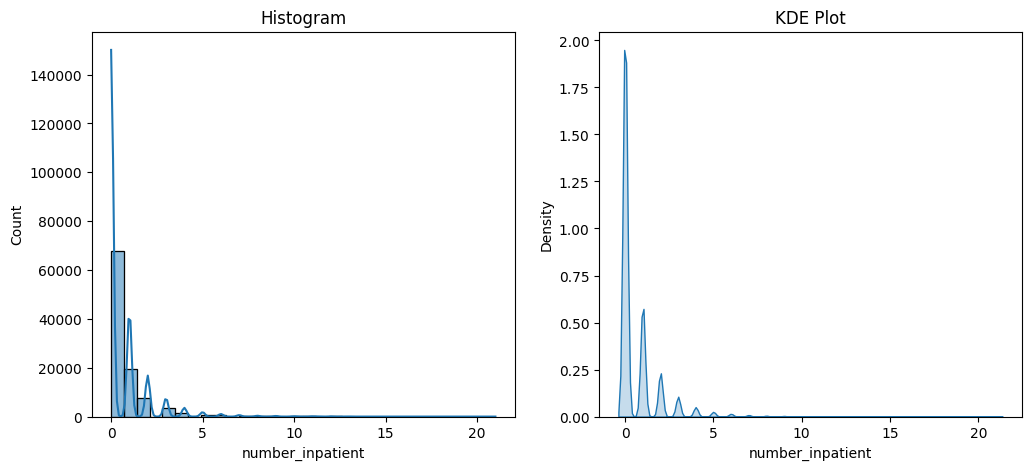

In [43]:
# number_inpatient

# 1. Distribution

fig , axes = plt.subplots(1,2, figsize=(12,5))

sns.histplot(df['number_inpatient'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Histogram")

sns.kdeplot(df['number_inpatient'], fill=True, ax=axes[1])
axes[1].set_title("KDE Plot")

plt.show()

<Axes: xlabel='number_inpatient'>

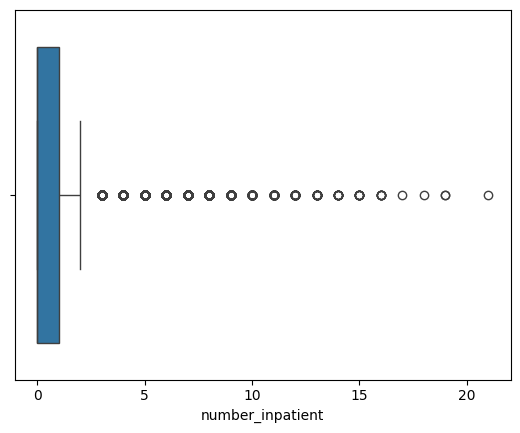

In [44]:
# 2. Boxplot / Outlier detection

sns.boxplot(x=df['number_inpatient'])

In [45]:
# 3. Mean/Median

print(f"Mean : {df['number_inpatient'].mean()}")
print(f"Median : {df['number_inpatient'].median()}")

Mean : 0.6355846427483467
Median : 0.0


In [46]:
# 4. Filtering Outlier using IQR

Q1 = df['number_inpatient'].quantile(0.25)
Q3 = df['number_inpatient'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = df[(df['number_inpatient'] < lower_bound) | (df['number_inpatient'] > upper_bound)]

print(f"Total number of outliers: {outliers.shape[0]}")

Total number of outliers: 7049


<Axes: xlabel='readmitted', ylabel='number_inpatient'>

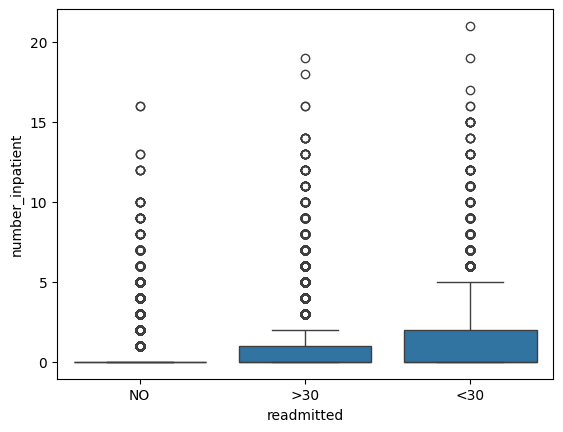

In [47]:
# Does patients with high inpatient visit are readmitted more (<30) ?  -> YES 

sns.boxplot(x='readmitted', y='number_inpatient', data=df)

#### number_diagnoses

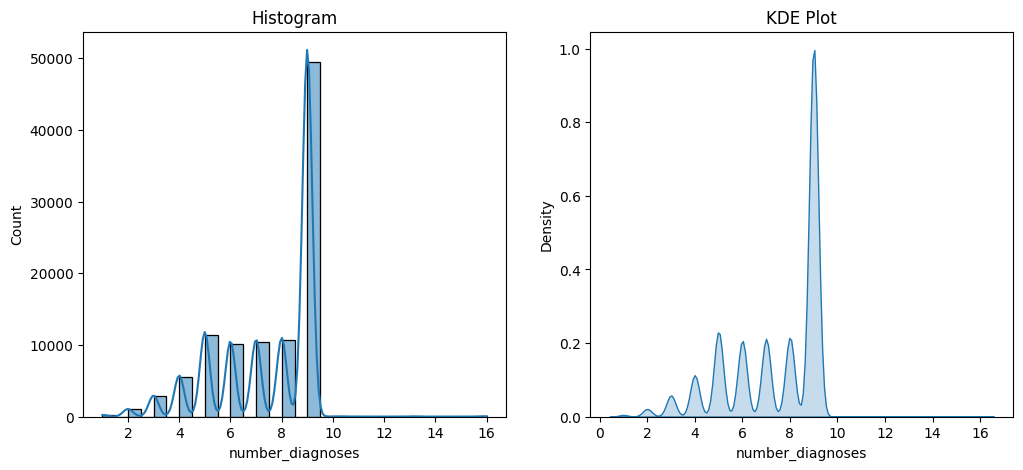

In [48]:
# number_diagnoses -> Number of problems that patient have

# 1. Distribution

fig , axes = plt.subplots(1,2, figsize=(12,5))

sns.histplot(df['number_diagnoses'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Histogram")

sns.kdeplot(df['number_diagnoses'], fill=True, ax=axes[1])
axes[1].set_title("KDE Plot")

plt.show()

<Axes: xlabel='number_diagnoses'>

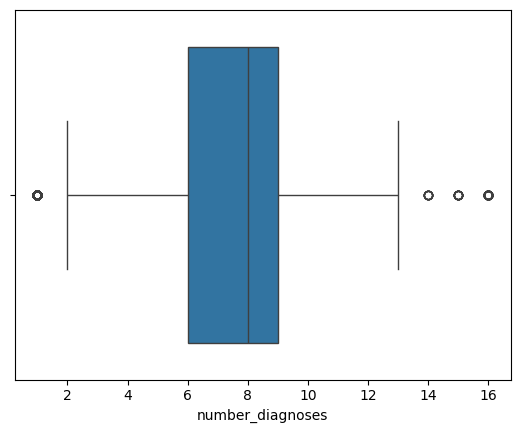

In [49]:
# 2. Boxplot / Outlier detection

sns.boxplot(x=df['number_diagnoses'])

In [50]:
# 3. Mean/Median

print(f"Mean : {df['number_diagnoses'].mean()}")
print(f"Median : {df['number_diagnoses'].median()}")

Mean : 7.4226487033597675
Median : 8.0


In [51]:
# 4. Filtering Outlier using IQR

Q1 = df['number_diagnoses'].quantile(0.25)
Q3 = df['number_diagnoses'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = df[(df['number_diagnoses'] < lower_bound) | (df['number_diagnoses'] > upper_bound)]

print(f"Total number of outliers: {outliers.shape[0]}")

Total number of outliers: 281


<Axes: xlabel='readmitted', ylabel='number_diagnoses'>

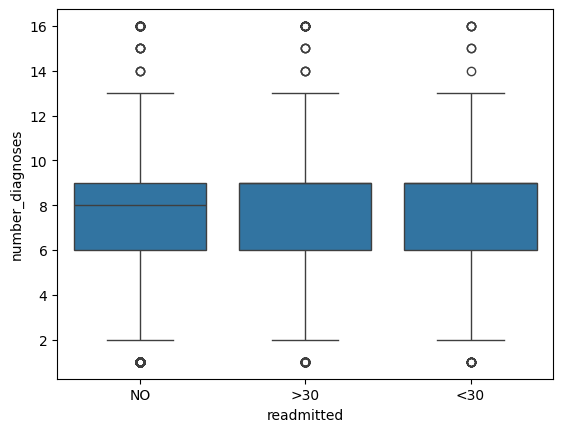

In [52]:
# Does patients with More medical problems are readmitted more?  -> NO

sns.boxplot(x='readmitted', y='number_diagnoses', data=df)

### Categorical Feature Analysis

In [53]:
# Important categorical columns
# ------------------------------
# gender
# race
# age
# admission_type
# discharge_disposition
# admission_source
# insulin
# diabetesMed
# change

#### gender

In [54]:
# gender

# 1. Value Counts
df['gender'].value_counts()

gender
Female    54708
Male      47055
Name: count, dtype: int64

In [55]:
# 2. Crosstab

pd.crosstab(df['gender'], df['readmitted'], normalize='index')*100

readmitted,<30,>30,NO
gender,,,
Female,11.245156,35.676683,53.078160
Male,11.061524,34.060142,54.878334


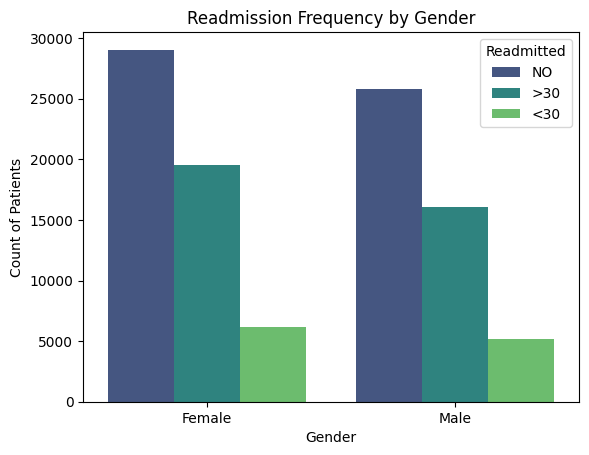

In [56]:
# 3. Countplot vs readmitted

sns.countplot(data=df, x='gender', hue='readmitted', palette='viridis')

plt.title('Readmission Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Patients')
plt.legend(title='Readmitted', loc='upper right')

plt.show()

In [57]:
# Insights

# both gender readmitted equally

#### race

In [58]:
# race

# 1. Value Counts
df['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
Unknown             2271
Hispanic            2037
Other               1505
Asian                641
Name: count, dtype: int64

In [59]:
# 2. Crosstab

pd.crosstab(df['race'], df['readmitted'], normalize='index')*100

readmitted,<30,>30,NO
race,,,
AfricanAmerican,11.218116,34.534097,54.247788
Asian,10.140406,25.117005,64.742590
Caucasian,11.290556,35.643044,53.066400
Hispanic,10.407462,31.516937,58.075601
Other,9.634551,29.634551,60.730897
Unknown,8.278292,23.690004,68.031704


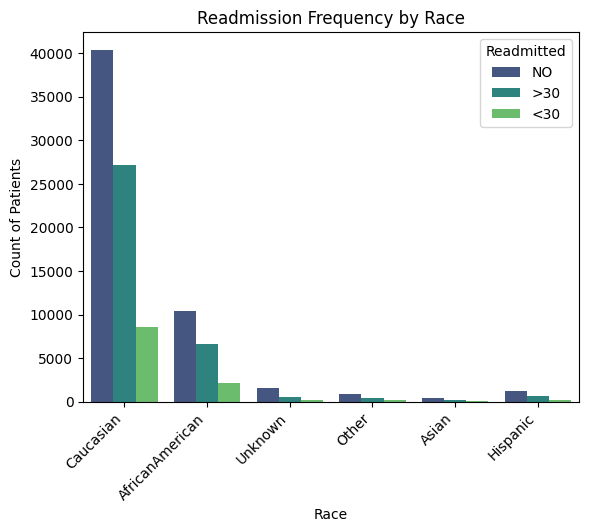

In [60]:
# 3. Countplot vs readmitted

sns.countplot(data=df, x='race', hue='readmitted', palette='viridis')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

plt.title('Readmission Frequency by Race')
plt.xlabel('Race')
plt.ylabel('Count of Patients')
plt.legend(title='Readmitted', loc='upper right')

plt.show()

In [61]:
# Insights

# Percentage of readmitted in 30 days are almost same in every race
# Race column is highly dominated by Caucasian	

#### age

In [62]:
# age

# 1. Value Counts
df['age'].value_counts()

age
[70-80)     26066
[60-70)     22482
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

In [63]:
# 2. Crosstab

pd.crosstab(df['age'], df['readmitted'], normalize='index')*100

readmitted,<30,>30,NO
age,,,
[0-10),1.863354,16.149068,81.987578
[10-20),5.788712,32.416787,61.794501
[20-30),14.242607,30.778515,54.978877
[30-40),11.231788,31.443709,57.324503
[40-50),10.604027,33.846154,55.549819
[50-60),9.666203,34.289522,56.044274
[60-70),11.128903,35.125878,53.745218
[70-80),11.773958,36.350035,51.876007
[80-90),12.083503,36.186544,51.729953


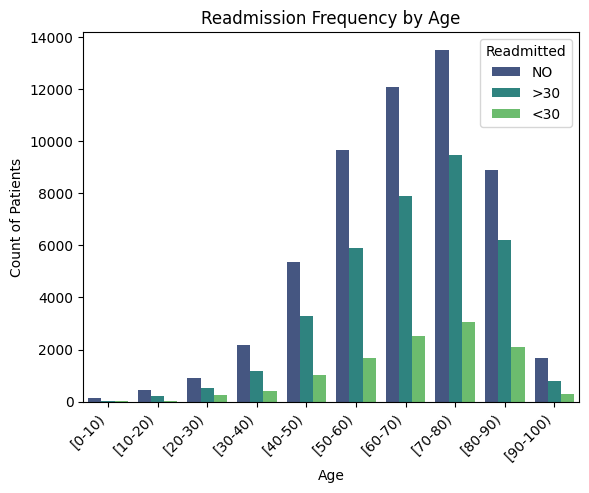

In [64]:
# 3. Countplot vs readmitted

sns.countplot(data=df, x='age', hue='readmitted', palette='viridis')


# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

plt.title('Readmission Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Count of Patients')
plt.legend(title='Readmitted', loc='upper right')

plt.show()

#### admission_type

In [65]:
# admission_type

# 1. Value Counts
df['admission_type'].value_counts()

admission_type
Emergency    53988
Elective     18868
Urgent       18480
Unknown      10396
Other           31
Name: count, dtype: int64

In [66]:
# 2. Crosstab

pd.crosstab(df['admission_type'], df['readmitted'], normalize='index')*100

readmitted,<30,>30,NO
admission_type,,,
Elective,10.393258,30.453678,59.153063
Emergency,11.522931,35.765355,52.711714
Other,3.225806,6.451613,90.322581
Unknown,10.657945,38.822624,50.519431
Urgent,11.179654,34.913420,53.906926


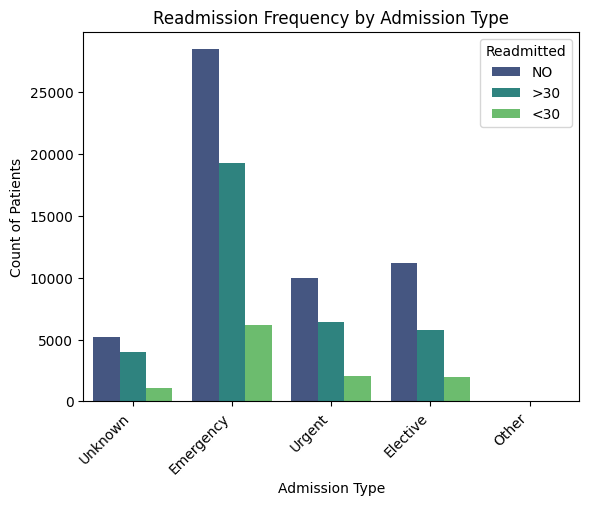

In [67]:
# 3. Countplot vs readmitted

sns.countplot(data=df, x='admission_type', hue='readmitted', palette='viridis')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

plt.title('Readmission Frequency by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Count of Patients')
plt.legend(title='Readmitted', loc='upper right')

plt.show()

In [68]:
# Insights 

# About 50% of patients are admitted in emergency case

#### discharge_disposition

In [69]:
# discharge_disposition

# 1. Value Counts
df['discharge_disposition'].value_counts()

discharge_disposition
Discharged to home                           60232
Transferred to SNF                           13954
Home with home health service                12902
Unknown                                       4680
Transferred to short term hospital            2128
Transferred to rehab facility                 1992
Expired                                       1652
Transferred to inpatient care institution     1184
Transferred to ICF                             815
Left AMA                                       623
Transferred to long term care hospital         412
Hospice home                                   399
Hospice medical facility                       372
Other                                          171
Transferred to psychiatric hospital            139
Home under care of Home IV provider            108
Name: count, dtype: int64

In [70]:
# 2. Crosstab

pd.crosstab(df['discharge_disposition'], df['readmitted'], normalize='index')*100

readmitted,<30,>30,NO
discharge_disposition,,,
Discharged to home,9.300704,35.723536,54.975760
Expired,0.000000,0.000000,100.000000
Home under care of Home IV provider,13.888889,35.185185,50.925926
Home with home health service,12.695706,41.559448,45.744846
Hospice home,4.761905,9.022556,86.215539
Hospice medical facility,6.451613,1.881720,91.666667
Left AMA,14.446228,35.473515,50.080257
Other,26.900585,30.409357,42.690058
Transferred to ICF,12.760736,34.110429,53.128834


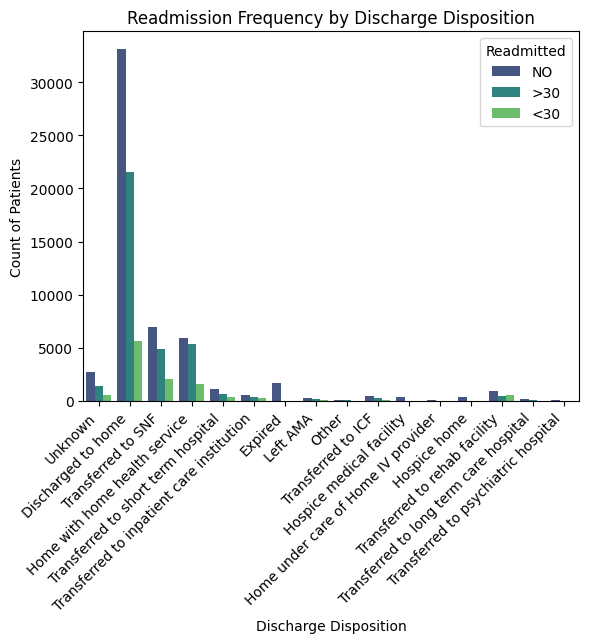

In [71]:
# 3. Countplot vs readmitted

sns.countplot(data=df, x='discharge_disposition', hue='readmitted', palette='viridis')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

plt.title('Readmission Frequency by Discharge Disposition')
plt.xlabel('Discharge Disposition')
plt.ylabel('Count of Patients')
plt.legend(title='Readmitted', loc='upper right')

plt.show()

In [72]:
# Insights

# 60% of patients are discharged to home and only 9% of tham are readmitted before 30 days

#### admission_source

In [73]:
# admission_source

# 1. Value Counts
df['admission_source'].value_counts()

admission_source
Emergency Room                        57492
Physician Referral                    29564
Unknown                                7067
Transfer from hospital                 3187
Transfer from health care facility     2264
Clinic Referral                        1104
Transfer from SNF                       855
HMO Referral                            187
Other                                    43
Name: count, dtype: int64

In [74]:
# 2. Crosstab

pd.crosstab(df['admission_source'], df['readmitted'], normalize='index')*100

readmitted,<30,>30,NO
admission_source,,,
Clinic Referral,10.054348,28.079710,61.865942
Emergency Room,11.688583,37.686983,50.624435
HMO Referral,15.508021,31.016043,53.475936
Other,9.302326,20.930233,69.767442
Physician Referral,10.587201,32.607225,56.805574
Transfer from SNF,11.812865,27.602339,60.584795
Transfer from health care facility,9.363958,17.579505,73.056537
Transfer from hospital,9.695639,21.085660,69.218701
Unknown,10.485354,36.153955,53.360691


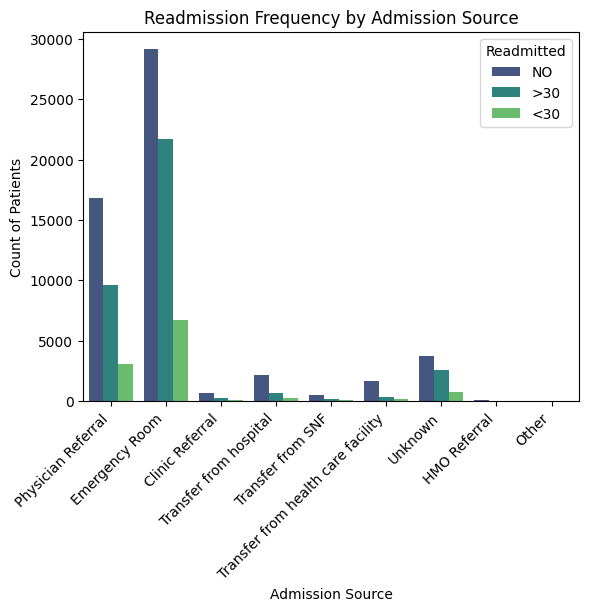

In [75]:
# 3. Countplot vs readmitted

sns.countplot(data=df, x='admission_source', hue='readmitted', palette='viridis')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

plt.title('Readmission Frequency by Admission Source')
plt.xlabel('Admission Source')
plt.ylabel('Count of Patients')
plt.legend(title='Readmitted', loc='upper right')

plt.show()

In [76]:
# Insights

# admission source of more than 55% of patients is emergency room

#### insulin

In [77]:
# insulin

# 1. Value Counts
df['insulin'].value_counts()

insulin
No        47380
Steady    30849
Down      12218
Up        11316
Name: count, dtype: int64

In [78]:
# 2. Crosstab

pd.crosstab(df['insulin'], df['readmitted'], normalize='index')*100

readmitted,<30,>30,NO
insulin,,,
Down,13.897528,38.893436,47.209036
No,10.037991,33.661883,56.300127
Steady,11.128400,33.978411,54.893189
Up,12.990456,38.547190,48.462354


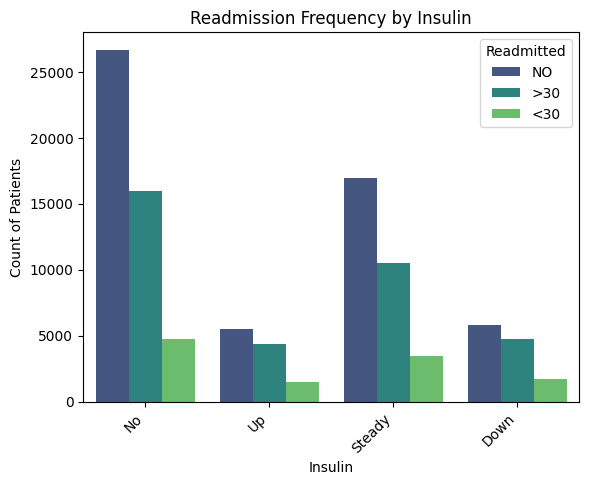

In [79]:
# 3. Countplot vs readmitted

sns.countplot(data=df, x='insulin', hue='readmitted', palette='viridis')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

plt.title('Readmission Frequency by Insulin')
plt.xlabel('Insulin')
plt.ylabel('Count of Patients')
plt.legend(title='Readmitted', loc='upper right')

plt.show()

In [80]:
# Insights 

# patients whos insulin dosage was decreased are having slightly (not much difference) more percentage of readmitted before 30 days

#### diabetesMed

In [81]:
# diabetesMed

# 1. Value Counts
df['diabetesMed'].value_counts()

diabetesMed
Yes    78361
No     23402
Name: count, dtype: int64

In [82]:
# 2. Crosstab

pd.crosstab(df['diabetesMed'], df['readmitted'], normalize='index')*100

readmitted,<30,>30,NO
diabetesMed,,,
No,9.597470,30.881976,59.520554
Yes,11.626957,36.137875,52.235168


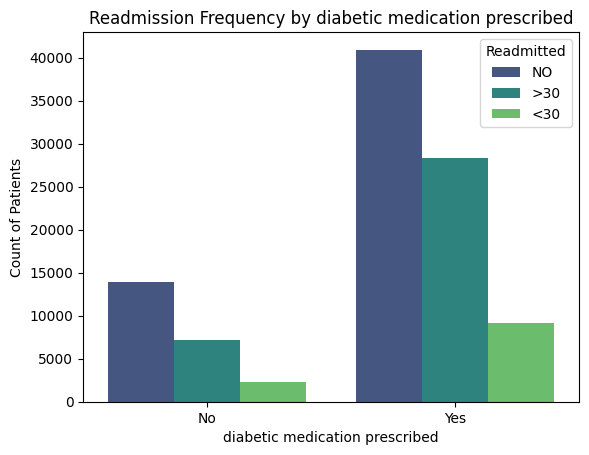

In [83]:
# 3. Countplot vs readmitted

sns.countplot(data=df, x='diabetesMed', hue='readmitted', palette='viridis')

plt.title('Readmission Frequency by diabetic medication prescribed')
plt.xlabel('diabetic medication prescribed')
plt.ylabel('Count of Patients')
plt.legend(title='Readmitted', loc='upper right')

plt.show()

#### change

In [84]:
# change

# 1. Value Counts
df['change'].value_counts()

change
No    54754
Ch    47009
Name: count, dtype: int64

In [85]:
# 2. Crosstab

pd.crosstab(df['change'], df['readmitted'], normalize='index')*100

readmitted,<30,>30,NO
change,,,
Ch,11.823268,36.741900,51.434832
No,10.591007,33.372904,56.036089


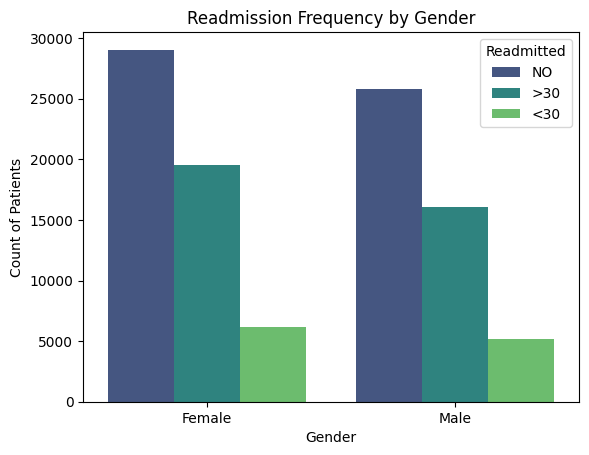

In [86]:
# 3. Countplot vs readmitted

sns.countplot(data=df, x='gender', hue='readmitted', palette='viridis')

plt.title('Readmission Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Patients')
plt.legend(title='Readmitted', loc='upper right')

plt.show()

### Correlation Analysis (Numerical)

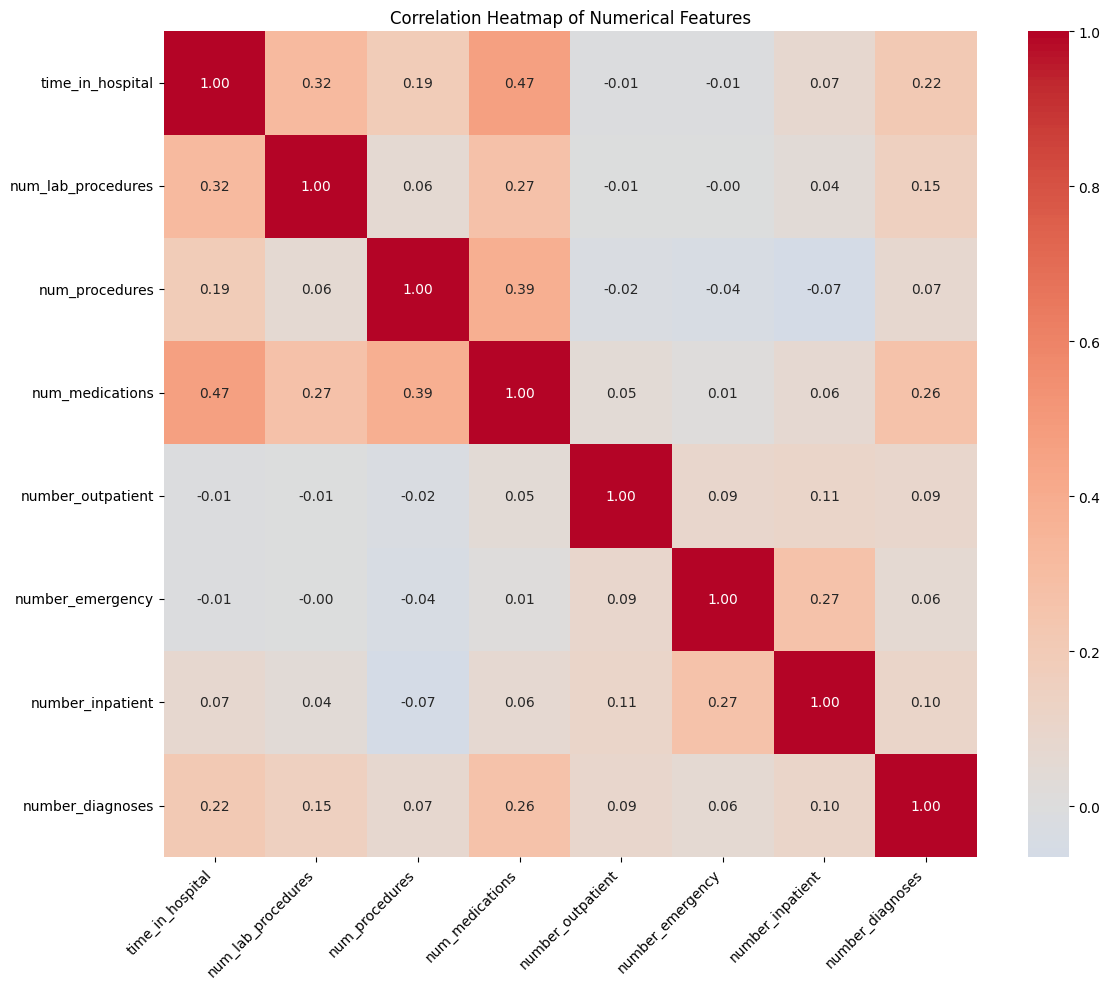

In [89]:
# 1. Define list of numerical columns
numeric_cols = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 
    'num_medications', 'number_outpatient', 'number_emergency', 
    'number_inpatient', 'number_diagnoses'
]

# 2. Calculating the correlation matrix
corr_matrix = df[numeric_cols].corr()

# 3. Creating the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)

# 4. Handling long labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

In [ ]:
# Insights

#  -  Moderate positive correlation observed between time_in_hospital and num_medications (0.47), indicating longer stays require more treatment.

#  -  Treatment-related features (lab tests, procedures, medications) show inter-correlation, suggesting severity grouping.

#  -  Emergency and inpatient visits moderately correlated (0.27), indicating chronic/high-risk patients.

#  -  No strong multicollinearity detected among numerical features.

### Readmission Deep Dive (Important for Insight Extraction)

#### Age vs. Readmission (Categorical vs. Target)

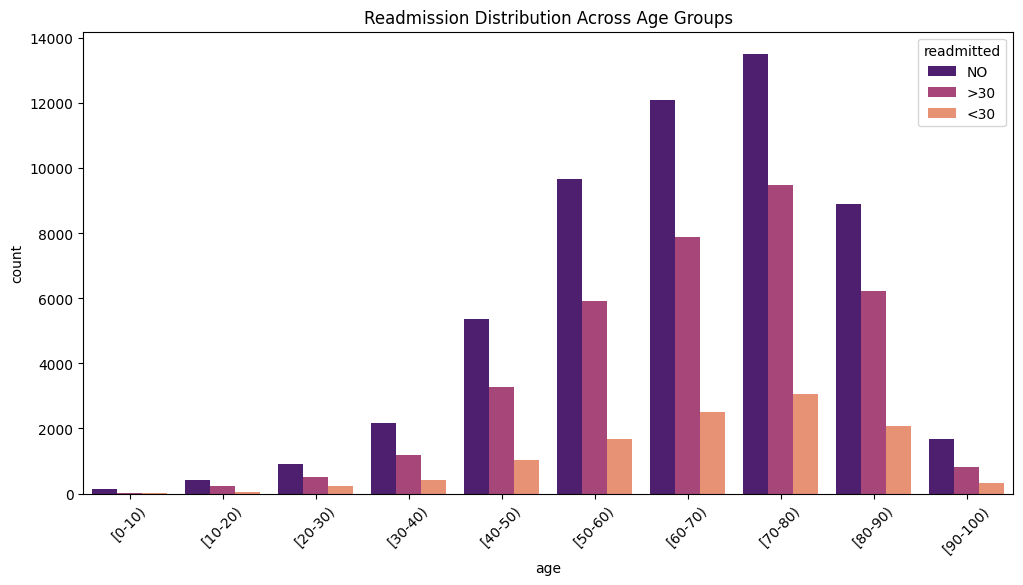

In [90]:
plt.figure(figsize=(12,6))
# Using a countplot with hue to see the breakdown
sns.countplot(data=df, x='age', hue='readmitted', palette='magma')
plt.title('Readmission Distribution Across Age Groups')
plt.xticks(rotation=45)
plt.show()

#### Insulin vs. Readmission (Treatment vs. Target)

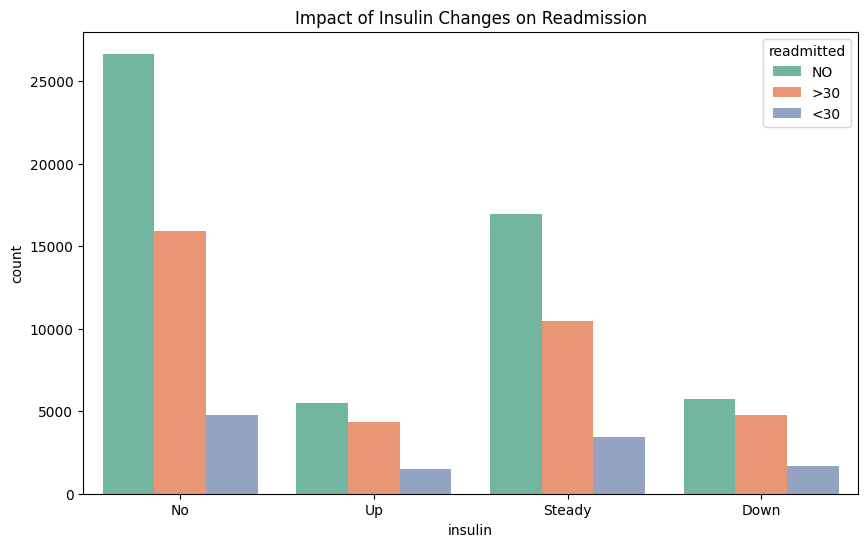

In [91]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='insulin', hue='readmitted', palette='Set2')
plt.title('Impact of Insulin Changes on Readmission')
plt.show()

#### Time in Hospital vs. Readmission (Numerical vs. Target)

C:\Users\dharm\AppData\Local\Temp\ipykernel_32252\171370860.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='readmitted', y='time_in_hospital', palette='Pastel1')


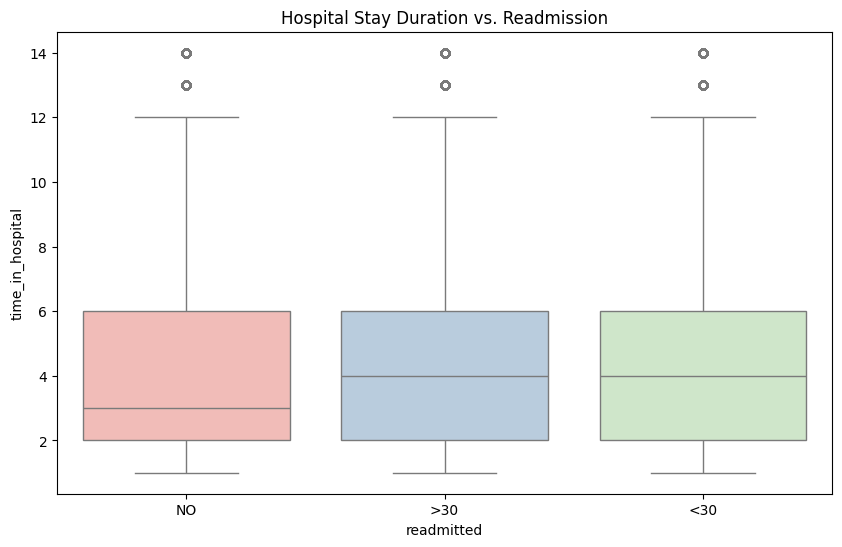

In [95]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='readmitted', y='time_in_hospital', palette='Pastel1')
plt.title('Hospital Stay Duration vs. Readmission')
plt.show()

#### Inpatient Visits vs. Readmission (Frequency vs. Target)

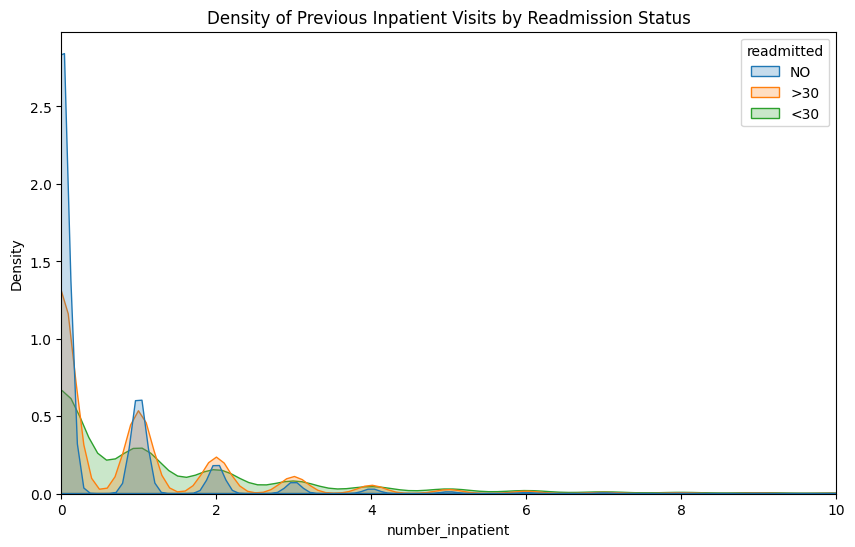

In [96]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='number_inpatient', hue='readmitted', fill=True, common_norm=False)
plt.title('Density of Previous Inpatient Visits by Readmission Status')
plt.xlim(0, 10) # Limiting x-axis to see the detail better
plt.show()

### Outlier Detection

In [ ]:
# Used Boxplot and IQR method in Numerical feature analysis, same as outlier detection

### Insights

In [ ]:
# Patients with higher inpatient visits are more likely to be readmitted.

# patients whos insulin dosage was decreased are having slightly (not much difference) more percentage of readmitted before 30 days

# admission source of more than 55% of patients is emergency room

# 60% of patients are discharged to home and only 9% of tham are readmitted before 30 days

# Most Patients are from age group of [70-80].

# Race column is highly dominated by Caucasian	

# Number of medications positively correlates with time in hospital.

# Dataset is moderately imbalanced (11% readmitted within 30 days).